#Objective

#####Dataset ini berisi "Population Collapse Time Series Data of the World". Dataset ini menjadi subjek diekstraksi menggunakan situs bank dunia dan PBB untuk menemukan penurunan populasi menurut negara dan wilayah. Indikator yang ada di dataset ini yaitu Jumlah Penduduk, Pertumbuhan Penduduk, Angka Harapan Hidup saat lahir, Angka Kesuburan, Angka Kematian (per 1.000 orang)), Angka Kelahiran (per 1.000 orang), Median Usia.

#####Bagaimana prediksi jumlah populasi pada tahun-tahun selanjutnya berdasarkan data-data yang telah disediakan seperti ekonomi, fertility, dll?

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Install feature-engine library

!pip install feature-engine
from feature_engine.outliers import Winsorizer

##Load Data

In [ ]:
data = pd.read_csv('dataset1.csv')

In [ ]:
data_duplicate = data.copy()

#### Urutan adalah: bersihkan data (tangani nilai yang hilang dan outlier) → bagi data menjadi set pelatihan dan pengujian → bangun dan evaluasi model Anda pada set pelatihan dan pengujian yang terpisah.


In [ ]:
data_duplicated = data[data.duplicated()]
data_duplicated.shape

(0, 21)

In [ ]:
print(data.isna().sum())

economy            0
Pop-YR2002         0
Pop-YR2021         0
Pop%               1
Life-YR2002        0
Life-YR2021        0
Life%              8
Fer-YR2002         0
Fer-YR2021         0
Fer%               8
Death-YR2002       0
Death-YR2021       0
Death%             6
Birth-YR2002       0
Birth-YR2021       0
Birth%             5
Med_Age-YR2002    43
Med_Age-YR2021    43
Med%              43
Pop_Gro-YR2002     0
Pop_Gro-YR2021     0
dtype: int64


In [ ]:
#Menginput missing values menggunakan median
from numpy.lib.function_base import median
data_inputed = data.fillna(data.median())
data_inputed

<ipython-input-36-aa3e9d2bc310>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_inputed = data.fillna(data.median())


,economy,Pop-YR2002,Pop-YR2021,Pop%,Life-YR2002,Life-YR2021,Life%,Fer-YR2002,Fer-YR2021,Fer%,...,Death-YR2021,Death%,Birth-YR2002,Birth-YR2021,Birth%,Med_Age-YR2002,Med_Age-YR2021,Med%,Pop_Gro-YR2002,Pop_Gro-YR2021
0,ABW,91781,106537,0.160774,73.726000,74.626000,0.012207,1.763000,1.180000,-0.330686,...,11.235000,0.750000,12.992000,7.193000,-0.446352,33.9,41.2,0.215339,1.194718,-0.045045
1,AFE,422741118,702977106,0.662902,52.540794,62.454590,0.188688,5.430475,4.354709,-0.198098,...,8.036899,-0.396157,40.047325,33.546266,-0.162334,23.8,30.0,0.183333,2.606598,2.607472
2,AFG,21000256,40099462,0.909475,56.454000,61.982000,0.097920,7.339000,4.643000,-0.367353,...,7.344000,-0.348936,48.201000,35.842000,-0.256405,14.0,16.7,0.192857,6.449321,2.851358
3,AFW,284952322,478185907,0.678126,50.927848,56.988657,0.119008,5.967267,4.978662,-0.165671,...,10.678952,-0.288397,42.927121,36.237034,-0.155848,23.8,30.0,0.183333,2.811453,2.573377
4,AGO,17516139,34503774,0.969828,47.386000,61.643000,0.300869,6.567000,5.304000,-0.192325,...,8.009000,-0.536382,47.448000,38.809000,-0.182073,15.7,16.2,0.031847,3.335132,3.166030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,1702310,1786038,0.049185,74.676000,76.806000,0.028523,2.533000,1.522000,-0.399131,...,7.220000,0.439968,16.858000,11.143000,-0.339008,21.5,30.5,0.418605,0.067931,-0.229016
262,YEM,19660653,32981641,0.677546,63.906000,63.753000,-0.002394,5.937000,3.795000,-0.360788,...,6.845000,-0.049702,38.654000,30.544000,-0.209810,14.6,18.7,0.280822,2.665834,2.137790
263,ZAF,47661514,59392255,0.246126,55.666000,62.341000,0.119912,2.324000,2.374000,0.021515,...,11.432000,-0.029871,20.040000,19.821000,-0.010928,21.5,27.1,0.260465,0.910101,0.998920
264,ZMB,10508294,19473125,0.853120,46.979000,61.223000,0.303199,5.792000,4.308000,-0.256215,...,6.973000,-0.544010,44.746000,34.511000,-0.228736,14.8,16.9,0.141892,3.056528,2.840806


In [ ]:
data_inputed.isnull().sum()

economy           0
Pop-YR2002        0
Pop-YR2021        0
Pop%              0
Life-YR2002       0
Life-YR2021       0
Life%             0
Fer-YR2002        0
Fer-YR2021        0
Fer%              0
Death-YR2002      0
Death-YR2021      0
Death%            0
Birth-YR2002      0
Birth-YR2021      0
Birth%            0
Med_Age-YR2002    0
Med_Age-YR2021    0
Med%              0
Pop_Gro-YR2002    0
Pop_Gro-YR2021    0
dtype: int64

In [ ]:
data_inputed.shape

(266, 21)

In [ ]:
print(data.skew())

Pop-YR2002        4.996426
Pop-YR2021        4.996070
Pop%              1.989014
Life-YR2002      -2.604873
Life-YR2021      -3.326357
Life%            -4.812107
Fer-YR2002        0.691693
Fer-YR2021        0.857340
Fer%              1.192054
Death-YR2002      0.361065
Death-YR2021      0.687980
Death%            0.559658
Birth-YR2002      0.479011
Birth-YR2021      0.653721
Birth%            0.279720
Med_Age-YR2002    0.394150
Med_Age-YR2021    0.074593
Med%              0.572282
Pop_Gro-YR2002    0.347247
Pop_Gro-YR2021   -0.671698
dtype: float64


<ipython-input-39-a7807bf59cf5>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.skew())


####Handling The Outliers

In [ ]:
#Calculate the IQR for the range

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

#Identifiy outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

#Display the outliers
outliers.sum()

<ipython-input-40-7d1b660a19c2>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-40-7d1b660a19c2>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-40-7d1b660a19c2>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


Birth%             7
Birth-YR2002       0
Birth-YR2021       0
Death%             2
Death-YR2002       1
Death-YR2021      23
Fer%              15
Fer-YR2002         1
Fer-YR2021         6
Life%             15
Life-YR2002        8
Life-YR2021        9
Med%               3
Med_Age-YR2002     0
Med_Age-YR2021     0
Pop%               4
Pop-YR2002        53
Pop-YR2021        51
Pop_Gro-YR2002     3
Pop_Gro-YR2021     6
economy            0
dtype: int64

In [ ]:
#Visualization to see the outliers
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(10, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

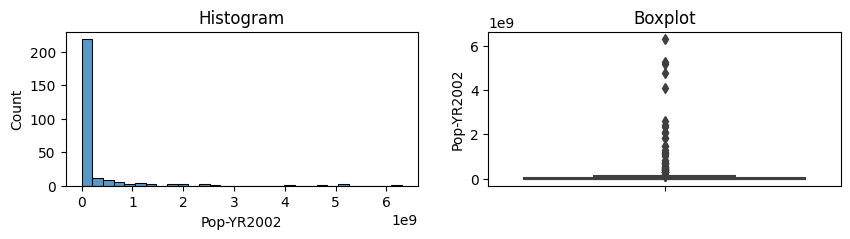

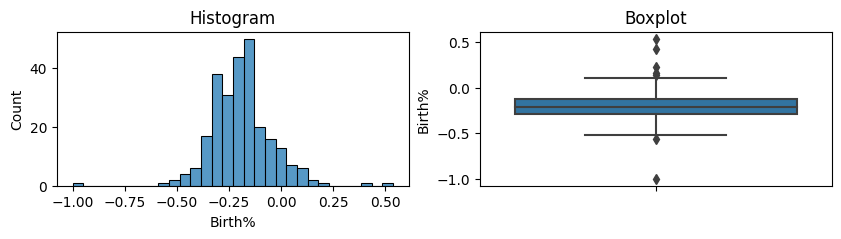

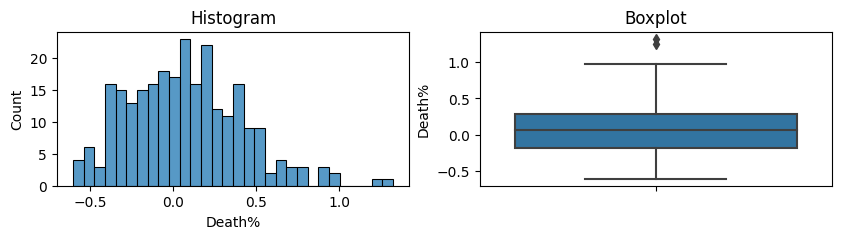

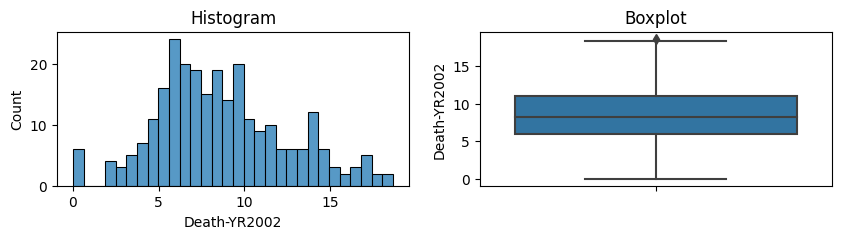

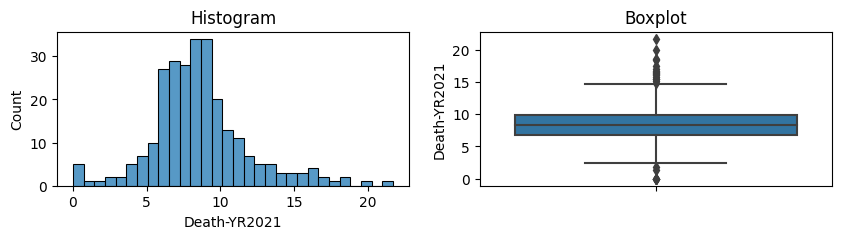

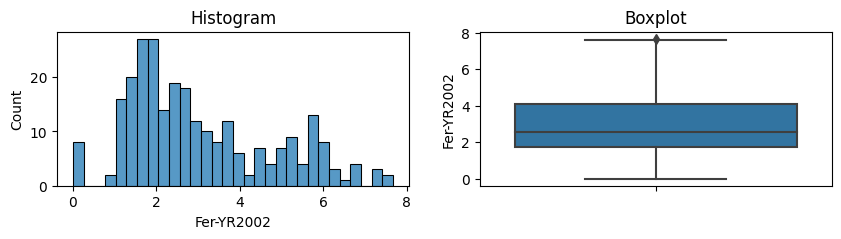

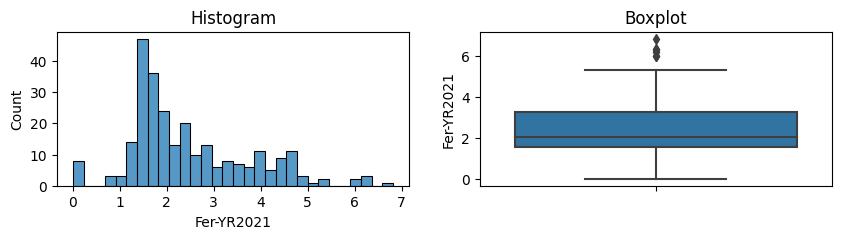

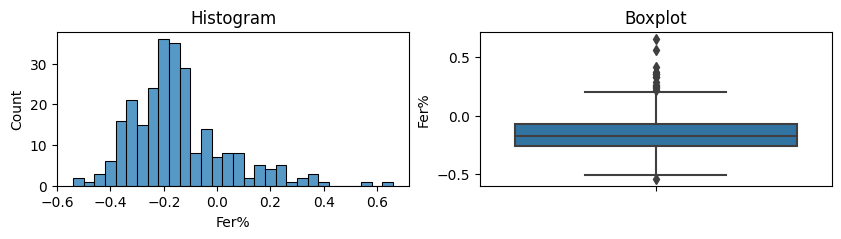

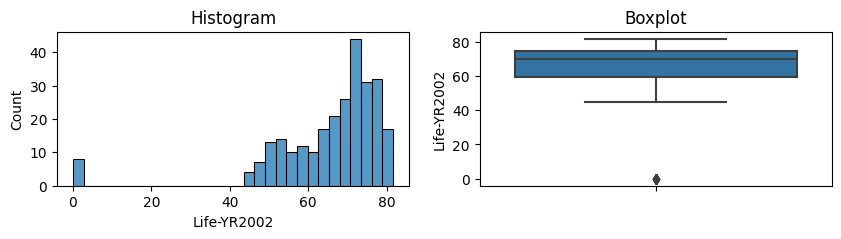

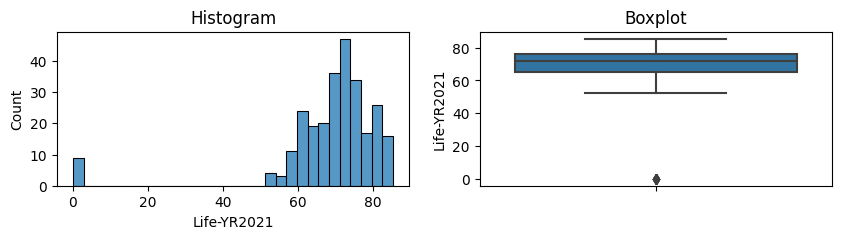

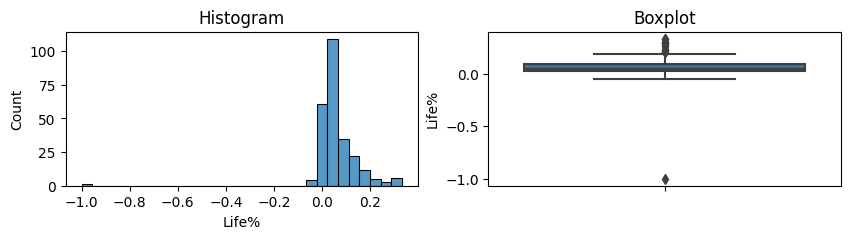

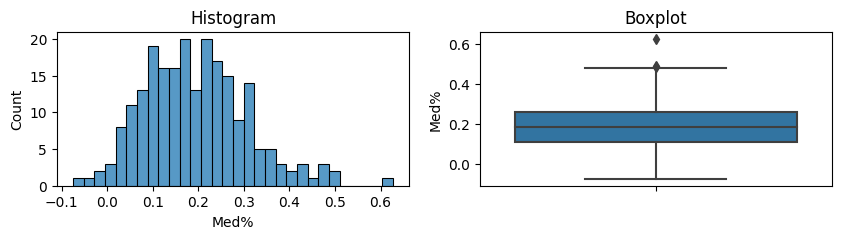

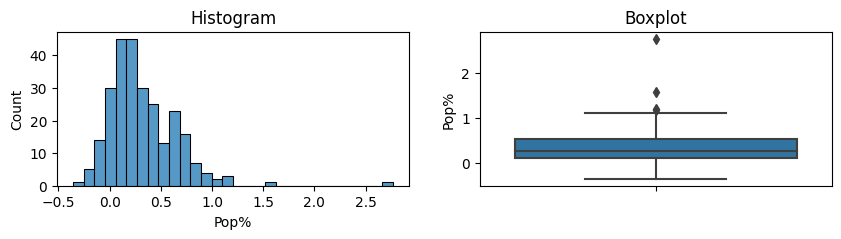

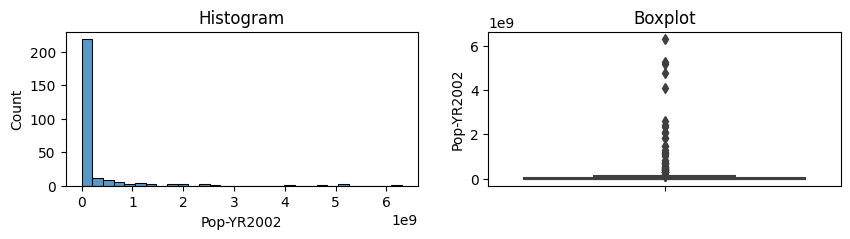

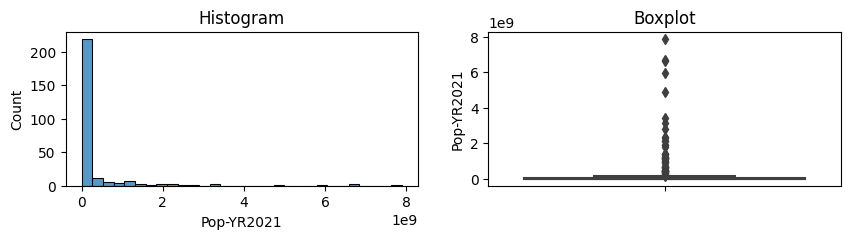

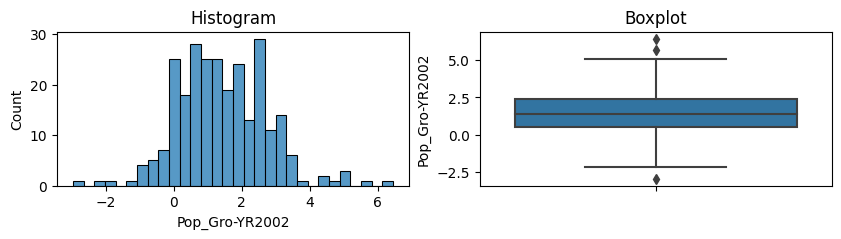

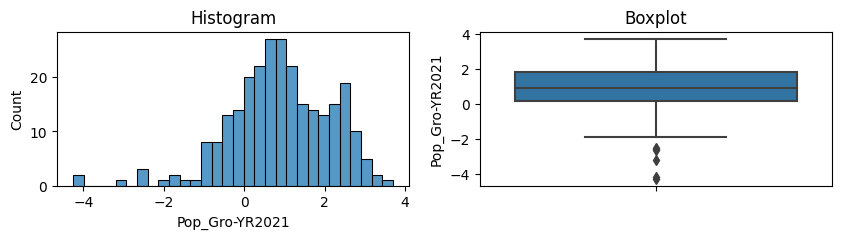

In [ ]:
diagnostic_plots(data, 'Pop-YR2002')
diagnostic_plots(data, 'Birth%')
diagnostic_plots(data, 'Death%')
diagnostic_plots(data, 'Death-YR2002')
diagnostic_plots(data, 'Death-YR2021')
diagnostic_plots(data, 'Fer-YR2002')
diagnostic_plots(data, 'Fer-YR2021')
diagnostic_plots(data, 'Fer%')
diagnostic_plots(data, 'Life-YR2002')
diagnostic_plots(data, 'Life-YR2021')
diagnostic_plots(data, 'Life%')
diagnostic_plots(data, 'Med%')
diagnostic_plots(data, 'Pop%')
diagnostic_plots(data, 'Pop-YR2002')
diagnostic_plots(data, 'Pop-YR2021')
diagnostic_plots(data, 'Pop_Gro-YR2002')
diagnostic_plots(data, 'Pop_Gro-YR2021')

In [ ]:
X = data_inputed.drop(columns=['economy', 'Pop_Gro-YR2021', 'Life-YR2021'])
y_pop = data_inputed['Pop_Gro-YR2021']
y_life = data_inputed['Life-YR2021']

<ipython-input-44-1f093b82a8d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_inputed.corr()


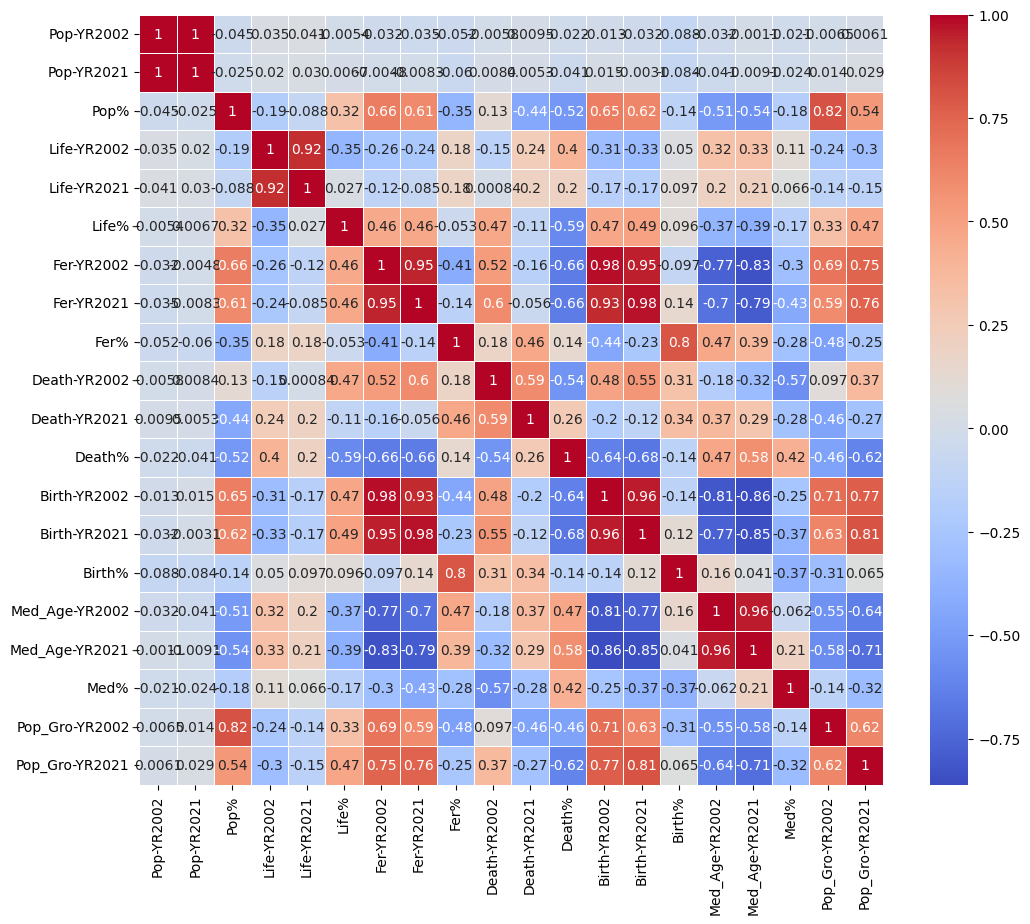

In [ ]:
correlation_matrix = data_inputed.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


##Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(X, y_life, test_size = 0.2)
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X, y_pop, test_size = 0.2)

#Linear Model
from sklearn.linear_model import LinearRegression
model_life = LinearRegression()
model_pop = LinearRegression()
model_life.fit(X_train_life, y_train_life)
model_pop.fit(X_train_pop, y_train_pop)

#Prediction
y_pred_life = model_life.predict(X_test_life)
y_pred_pop = model_pop.predict(X_test_pop)



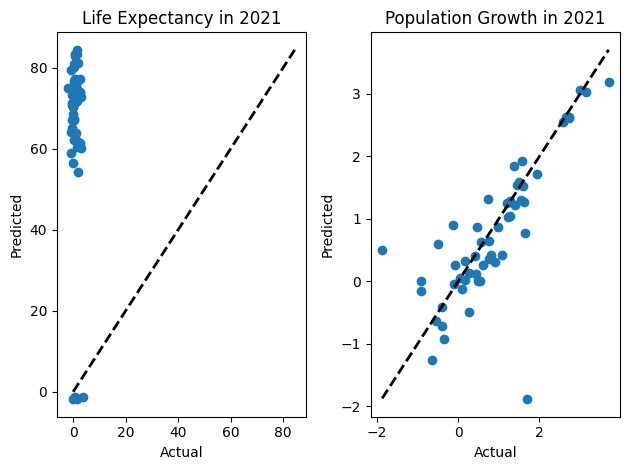

RMSE Life:  0.4430381693997964
R-square Life:  0.9990677941363807
RMSE Pop:  0.5195660291148523
R-square Pop:  0.5932382823719322


In [ ]:
#Uji akurasi data test
from sklearn.metrics import r2_score, mean_squared_error
rmse_life = mean_squared_error(y_test_life, y_pred_life, squared = True)
r2_life = r2_score(y_test_life, y_pred_life)
rmse_pop = mean_squared_error(y_test_pop, y_pred_pop, squared = True)
r2_pop = r2_score(y_test_pop, y_pred_pop)

#Visualization
plt.subplot(1,2,1)
plt.scatter(y_test_pop, y_pred_life)
plt.plot([y_test_life.min(), y_test_life.max()], [y_test_life.min(), y_test_life.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Life Expectancy in 2021')

plt.subplot(1,2,2)
plt.scatter(y_test_pop, y_pred_pop)
plt.plot([y_test_pop.min(), y_test_pop.max()], [y_test_pop.min(), y_test_pop.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Population Growth in 2021')

plt.tight_layout()
plt.show()
print('RMSE Life: ', rmse_life)
print('R-square Life: ', r2_life)
print('RMSE Pop: ', rmse_pop)
print('R-square Pop: ', r2_pop)

In [ ]:
# Memeriksa ukuran dari y_test_life dan y_pred_life
print("Shape of y_test_life:", y_test_life.shape)
print("Shape of y_pred_life:", y_pred_life.shape)

# Memeriksa ukuran dari y_test_pop dan y_pred_pop
print("Shape of y_test_pop:", y_test_pop.shape)
print("Shape of y_pred_pop:", y_pred_pop.shape)

Shape of y_test_life: (54,)
Shape of y_pred_life: (54,)
Shape of y_test_pop: (54,)
Shape of y_pred_pop: (54,)
